# In Class Exercise 1 - Convolution and Deconvolution
This Notebook will teach the following:
- Convolution (Padding, Strides, Pooling)
- Deconvolution
    
    
But first, let's import the fundamental packages
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.   

In [2]:
#lets start with importing the necessary packages so we can simplify our life and defining plot functions

import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

from PIL import Image
from scipy import ndimage
import cv2
import torch
from torch import nn
import torch.nn.functional as F





## 1 - Convolution

Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep Learning. A convolution layer transforms an input volume into an output volume of different size, as shown below. 



In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 


<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>



*****Dimensions of input image******  torch.Size([1, 3, 112, 112])


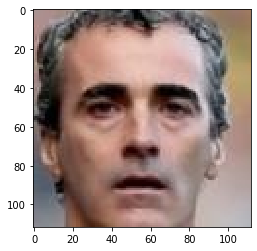

In [3]:
# First read the input image
img = cv2.imread('./sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(112,112))
plt.imshow(img)
img = torch.from_numpy(img.transpose((2, 0, 1)))
img_tensor = img.float().div(255).unsqueeze(0)
print('*****Dimensions of input image****** ',img_tensor.shape)


In [35]:
#Define the neural Network
class Convolution(nn.Module):
    def __init__(self):
        super(Convolution, self).__init__()

        

################################################################################
# TODO:                                                                        #
#   Define a 4x4 Kernel  with the name kernel   #

################################################################################
        # kernel = [[1/15, 1/15, 1/15],
        #       [1/15, 1/15, 1/15],
        #       [1/15, 1/15, 1/15]]

        kernel = [[1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16]]
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
        
        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
        self.weight = nn.Parameter(data=kernel, requires_grad=False)

    def forward(self, x):
        x1 = x[:, 0]
        x1 = F.conv2d(x1.unsqueeze(1), self.weight, stride=2, padding=0)
        x2 = x[:, 1]
        x2 = F.conv2d(x2.unsqueeze(1), self.weight, stride=2, padding=0)
        x3 = x[:, 2]
        x3 = F.conv2d(x3.unsqueeze(1), self.weight, stride=2, padding=0)
        # another one convolution
        x4 = x[:, 0]
        x4 = F.conv2d(x4.unsqueeze(1), self.weight, stride=2, padding=0)
        
        
################################################################################
# TODO:                                                                                                  #
#   use F.conv2d to convolute the 3 layers of the RGB imgae   #

################################################################################
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

        x = torch.cat([x1,
                       x2,
                       x3,
                       x4
                       ], dim=1)
        return x


shape torch.Size([1, 3, 112, 112])
torch.Size([1, 4, 55, 55])
*****Dimensions of output image******: (55, 55, 4)
AxesImage(45,36;279x217.44)


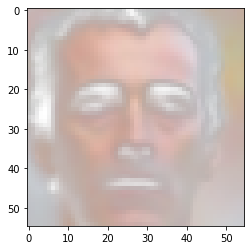

In [36]:
#create an instance of our FilterClass
Convolution1 = Convolution()

print('shape',img_tensor.shape)
out = Convolution1(img_tensor)
print(out.size())
#print(out)

img_out = out.mul(255).byte()
img_out = img_out.cpu().numpy().squeeze(0).transpose((1, 2, 0))
print('*****Dimensions of output image******:',img_out.shape)

print(plt.imshow(img_out))


## - Observation
Answer the following questions and write what you observe:
- How does the image change if you change
   - the Kernel
   - the Stride
   - the Padding
- What happens to the output dimensions? How can you calculate them?
- What happenes if you implement more than 1 convolution?

## 2 - Deconvolution
Now we will take the image and try to restore the original image again.

In [39]:
#Define the class Deconvolution
class Deconvolution(nn.Module):
    def __init__(self):
        super(Deconvolution, self).__init__()
        # kernel = [[0.03797616, 0.044863533, 0.03797616],
        #           [0.044863533, 0.053, 0.044863533],
        #           [0.03797616, 0.044863533, 0.03797616]]


        kernel = [[1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16],
              [1/16, 1/16, 1/16, 1/16]]

        # kernel = [[1/15, 1/15, 1/15],
        #       [1/15, 1/15, 1/15],
        #       [1/15, 1/15, 1/15]]
        #kernel3d =[kernel,kernel,kernel]
        
        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
        self.weight = nn.Parameter(data=kernel, requires_grad=False)

    def forward(self, x):
        print(x.shape)
        x1 = x[:, 0]
        x1 = F.conv_transpose2d(x1.unsqueeze(1), self.weight, stride=2, padding=0)
        x2 = x[:, 1]
        x2 = F.conv_transpose2d(x2.unsqueeze(1), self.weight, stride=2, padding=0)
        x3 = x[:, 2]
        x3 = F.conv_transpose2d(x3.unsqueeze(1), self.weight, stride=2, padding=0)
        # another one Deconvolution
        # x4 = x[:, 2]
        # x4 = F.conv_transpose2d(x3.unsqueeze(1), self.weight, stride=2, padding=0)

        x = torch.cat([x1,
                       x2,
                       x3,
                      #  x4
                       ], dim=1)
################################################################################
# TODO:                                                                                                                     #
#   use F.conv_transpose2d to convolute the 3 layers of the RGB imgae  #
# then concatenate the 3 channels                                                                     #


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################


        return x


torch.Size([1, 4, 55, 55])
torch.Size([1, 3, 112, 112])
*****Dimensions of output image******: (112, 112, 3)
AxesImage(45,36;279x217.44)


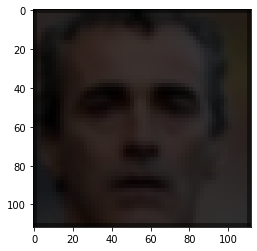

In [40]:
Deconvolution1 = Deconvolution()
out = Deconvolution1(out)
print(out.size())
#print(out)

img_out = out.mul(255).byte()
img_out = img_out.cpu().numpy().squeeze(0).transpose((1, 2, 0))
print('*****Dimensions of output image******:',img_out.shape)

print(plt.imshow(img_out[:,:,:]))


AxesImage(45,36;279x217.44)


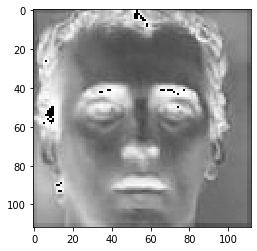

In [41]:
#### How much did the image change in numbers ##########

################################################################################
# TODO:                                                                                                                     #
# Find a way to compare the deconvoluted output and the input              #
# You can use measures like L1 difference, L2, difference, SSIM, etc.         # 
img_out = F.interpolate(out, size=[112, 112])
img_out = img_out.mul(255).byte().cpu().numpy().squeeze(0).transpose((1, 2, 0))
img_input = img.cpu().numpy().transpose((1, 2, 0))

difference=img_out-img_input
print(plt.imshow(difference[:,:,0]))

##########################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## - Observation
Answer the following questions and write what you observe:
- How does the image change if you change
   - the Kernel
   - the Stride
   - the Padding
- What happens to the output dimensions? How can you calculate them?
- What happenes if you implement more than 1 convolution?
- Why is the image darker?

## 3 - Padding
This exercise will deal with Padding

If you have trouble solving the problem, use the [Hint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)

In [ ]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape ( n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    ### START CODE HERE ### (≈ 1 line)
    ###Use the np.pad function to create the function described above
    
    ### END CODE HERE ###
    
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1, 1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


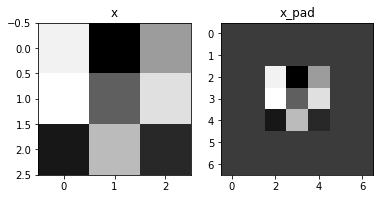

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1, 1] =", x[1, 1])
print ("x_pad[1, 1] =", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

## 4 - Summary 
You did a your first convolutional Neural Network with 2 layers, 1 Convolution and 1 Deconvolution. Also, you learned about padding, strides, kernels and image comparisons. 

**Don't forget to upload your file to moodle after you finished answering the questions and the code** 